In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [2]:
k = 5 
l = 3 
m = 2 
g = 9.8 
r0 = 15 
thetha_0 = np.pi/8
r_prime_0 = 0
thetha_prime_0 = 0

N= 2001
t= np.linspace(0,30,N)
h=  (t[-1]-t[0])/(len(t)-1)



In [3]:
def acel_r(r,th,th_p):
    a_r= k/m *(l-r) + g*np.cos(th) + r*th_p **2
    return a_r

def acel_th(r,th,r_p,th_p):
    a_th=  -g/r * np.sin(th) - (2/r) *r_p * th_p
    return a_th


def GetEuler(f,f_p,h,t):
    y0=f(t)
    y1=y0+f_p(t)*h
    return y1
    

def Beeman(r0,th0,rp0,thp0,t):
    h=  (t[-1]-t[0])/(len(t)-1)
    r1=r0+h*rp0
    th1=th0+h*thp0

    acele_r= np.zeros(len(t)-1)
    acele_r[0]= acel_r(r0,th0,thp0)
    acele_t= np.zeros(len(t)-1)
    acele_t[0]= acel_th(r0,th0,rp0,thp0)
    velocidades_1= np.zeros(len(t)-1)
    velocidades_1[0]= rp0
    velocidades_1[1]= rp0+h*acele_r[0]
    posiciones_1= np.zeros(len(t)-1)
    posiciones_1[0]= r0
    posiciones_1[1]= r1
    velocidades_2= np.zeros(len(t)-1)
    velocidades_2[0]= thp0
    velocidades_2[1]= thp0+h*acele_t[0]
    posiciones_2= np.zeros(len(t)-1)
    posiciones_2[0]= th0
    posiciones_2[1]= th1
    
    acele_r[1]= acel_r(r1,th1,velocidades_2[1])
    acele_t[1]= acel_th(r1,th1,velocidades_1[1],velocidades_2[1])
    
    for i in range(1,N-2):
        posiciones_1[i+1]= posiciones_1[i] + h*velocidades_1[i] + (1/6)*(4*acele_r[i]- acele_r[i-1])*h**2
        velocidades_1[i+1]= velocidades_1[i] + (1/2)*(3*acele_r[i]-acele_r[i-1])*h
        posiciones_2[i+1]= posiciones_2[i] + h* velocidades_2[i] + (1/6)*(4*acele_t[i]- acele_t[i-1])*h**2
        velocidades_2[i+1]= velocidades_2[i] + (1/2)*(3*acele_t[i]-acele_t[i-1])*h
        acele_r[i+1]= acel_r(posiciones_1[i+1],posiciones_2[i+1],velocidades_2[i+1])
        acele_t[i+1]= acel_th(posiciones_1[i+1],posiciones_2[i+1],velocidades_1[i+1],velocidades_2[i+1])
    return posiciones_1, posiciones_2

data_r,data_th= Beeman(r0,thetha_0,r_prime_0,thetha_prime_0,t)


<ipython-input-4-21ee5fc9c551>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig1.add_subplot(1,2,2)


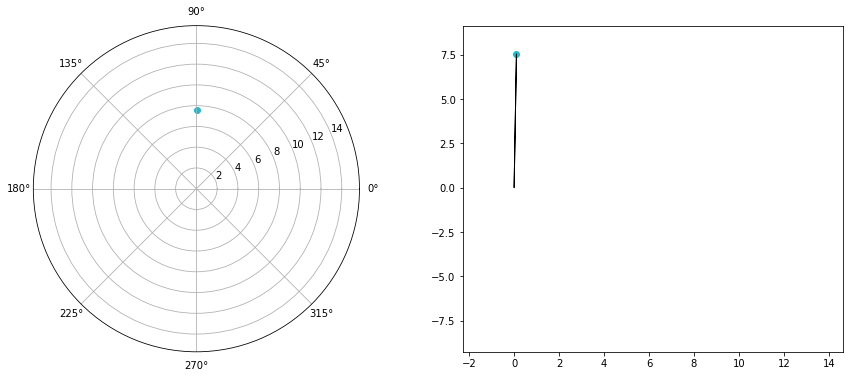

In [4]:
def ReduceTime(t,factor):

    Newt = []
    
    for i in range(len(t)-1):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


def getncontred(tredi):
    
    n=int(tredi/0.015)

    return n


def animacion(r,theta,t):
    Tred=ReduceTime(t,20)
    tim=len(Tred)
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    fig1=plt.figure(figsize=(15,6))
    ax1 = fig1.add_subplot(1,2,1, projection='polar')
    camera = Camera(fig1)
    for n in range(tim):
        tiempok=Tred[n]
        ni=getncontred(tiempok)
        ax2 = fig1.add_subplot(1,2,2)
        ax2.scatter(x[ni],y[ni])
        ax2.arrow(0.,0.,x[ni],y[ni])
        ax1.scatter(theta[ni],r[ni])
        camera.snap()
    animation = camera.animate()
    animation.save('pendulo.mp4')

animacion(data_r,data_th,t)